<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#quick-start" data-toc-modified-id="quick-start-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>quick start</a></span><ul class="toc-item"><li><span><a href="#Resources" data-toc-modified-id="Resources-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Resources</a></span></li></ul></li><li><span><a href="#FULL-MODEL" data-toc-modified-id="FULL-MODEL-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>FULL MODEL</a></span><ul class="toc-item"><li><span><a href="#Packages" data-toc-modified-id="Packages-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Packages</a></span><ul class="toc-item"><li><span><a href="#Qnetwork" data-toc-modified-id="Qnetwork-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Qnetwork</a></span></li></ul></li><li><span><a href="#POMDP-RNN-Game" data-toc-modified-id="POMDP-RNN-Game-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>POMDP RNN Game</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Results</a></span><ul class="toc-item"><li><span><a href="#Standard-setting：-grid-=--(3,7)，-holes-=-0" data-toc-modified-id="Standard-setting：-grid-=--(3,7)，-holes-=-0-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Standard setting： grid =  (3,7)， holes = 0</a></span></li><li><span><a href="#Model-Tranining" data-toc-modified-id="Model-Tranining-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Model Tranining</a></span></li><li><span><a href="#decoding-vs-performance" data-toc-modified-id="decoding-vs-performance-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>decoding vs performance</a></span></li><li><span><a href="#learning-rate-vs-performance" data-toc-modified-id="learning-rate-vs-performance-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>learning rate vs performance</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-2.3.5"><span class="toc-item-num">2.3.5&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Anlytic-part-,-check-the-behaviour-correspond-to-each-decoding-level-and-explain-why" data-toc-modified-id="Anlytic-part-,-check-the-behaviour-correspond-to-each-decoding-level-and-explain-why-2.3.6"><span class="toc-item-num">2.3.6&nbsp;&nbsp;</span>Anlytic part , check the behaviour correspond to each decoding level and explain why</a></span></li></ul></li><li><span><a href="#PCA" data-toc-modified-id="PCA-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>PCA</a></span></li></ul></li></ul></div>

# quick start 

**This study tries to loop upon each strategy on its own decoding/navigation performance**

**Somethings to study**:
1.  Take the overall statistics of results, compare what is qualitative change between echo state and pretrained network of different eigen values. Slightly better generalization of pretrained net in overall 
2.  Relation of decoding vs performance  Does decoding predicts small size performance?  Does decoding generalization performance? Does the decoding evolving in the q leanring predicts anything?   
3.  Does the eigen values, which are the fingerprint of dynamics, predicts anything?   

## Resources

* [*The* Reinforcement learning book from Sutton & Barto](http://incompleteideas.net/sutton/book/the-book-2nd.html)
* [The REINFORCE paper from Ronald J. Williams (1992)](http://www-anw.cs.umass.edu/~barto/courses/cs687/williams92simple.pdf)


# FULL MODEL

## Packages

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from itertools import count
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd
from torch.autograd import Variable
from torch.nn import init
from torch.nn import DataParallel
from torch.utils.data import DataLoader

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation
import seaborn as sns
from IPython.display import HTML

import pretrain
from pretrain import *

import navigation2
from navigation2 import *

import sklearn
from sklearn.svm import SVC

import scipy
from scipy.spatial import distance
from scipy import signal

import Nets
from Nets import*

%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


/home/tie/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Performance summary
Try to get all performances 15, 35, 55, 85 here.  

In [2]:
Performance_s_early_1 = np.load('performance_s_early_net_1.npy')
# Performance_l_early_1 = np.load('performance_l_early_net_1.npy')[:-3]
Performance_s_late_1 = np.load('performance_s_late_net_1.npy')
Performance_l_late_1 = np.load('performance_l_late_net_1.npy')
Performance_m_late_1 = np.load('performance_m_late_net_1.npy')
Performance_exl_late_1 = np.load('performance_exl_late_net_1.npy')
Performance_exxl_late_1 = np.load('performance_exxl_late_net_1.npy')
Performance_exxxl_late_1 = np.load('performance_exxxl_late_net_1.npy')

In [3]:
Performance_s_early_2 = np.load('performance_s_early_net_2.npy')
# Performance_l_early_2 = np.load('performance_l_early_net_2.npy')[:-2]
Performance_s_late_2 = np.load('performance_s_late_net_2.npy')
Performance_l_late_2 = np.load('performance_l_late_net_2.npy')
Performance_m_late_2 = np.load('performance_m_late_net_2.npy')
Performance_exl_late_2 = np.load('performance_exl_late_net_2.npy')
Performance_exxl_late_2 = np.load('performance_exxl_late_net_2.npy')
Performance_exxxl_late_2 = np.load('performance_exxxl_late_net_2.npy')

In [4]:
Performance_s_early_3 = np.load('performance_s_early_net_3.npy')
# Performance_l_early_3 = np.load('performance_l_early_net_3.npy')
Performance_s_late_3 = np.load('performance_s_late_net_3.npy')
Performance_l_late_3 = np.load('performance_l_late_net_3.npy')
Performance_m_late_3 = np.load('performance_m_late_net_3.npy')
Performance_exl_late_3 = np.load('performance_exl_late_net_3.npy')
Performance_exxl_late_3 = np.load('performance_exxl_late_net_3.npy')
Performance_exxxl_late_3 = np.load('performance_exxxl_late_net_3.npy')

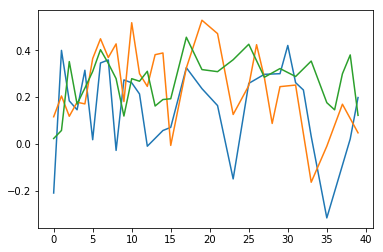

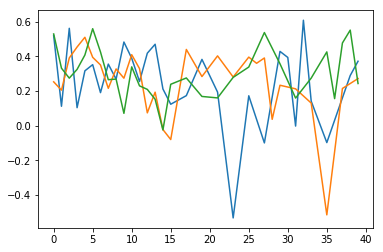

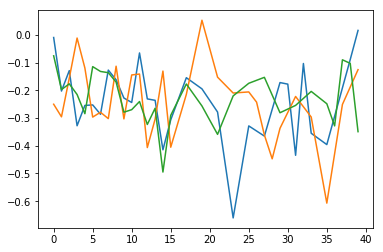

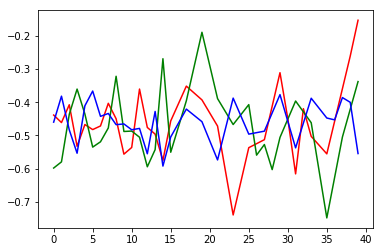

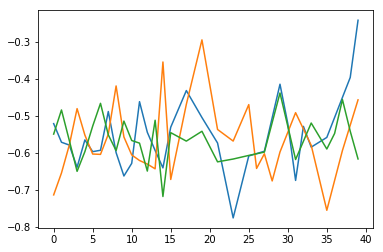

In [5]:
neurons1 = [0, 1, 3, 4, 5, 6, 17, 21] + [2, 7, 9, 13, 15, 32] + [19, 25, 27, 30, 35, 38, 39] + [11, 31, 33] + [8, 10, 12, 14, 23, 29]
neurons1 = np.sort(neurons1)
neurons2 = [0, 1, 3, 5, 7, 8, 28, 31] + [9, 11, 12, 13, 14, 15, 33, 35] + [17, 19, 21, 23, 25, 37, 39] + [26, 27, 29] + [2, 4, 6, 10]
neurons2 = np.sort(neurons2)
neurons3 = [0, 1, 2, 3, 4, 5, 7, 8, 11] + [9, 13, 15, 17, 19, 21, 31, 36, 38] + [23, 25, 27, 29, 33, 35, 37, 39] + [6, 10, 12, 14]
neurons3 = np.sort(neurons3)
Neurons = np.concatenate((neurons1, neurons2, neurons3), axis = 0)
plt.plot(neurons1, np.mean(Performance_s_early_1, axis = 1))
plt.plot(neurons2, np.mean(Performance_s_early_2, axis = 1))
plt.plot(neurons3, np.mean(Performance_s_early_3, axis = 1))
plt.figure()
plt.plot(neurons1, np.mean(Performance_m_late_1, axis = 1))
plt.plot(neurons2, np.mean(Performance_m_late_2, axis = 1))
plt.plot(neurons3, np.mean(Performance_m_late_3, axis = 1))
plt.figure()
plt.plot(neurons1, np.mean(Performance_l_late_1, axis = 1))
plt.plot(neurons2, np.mean(Performance_l_late_2, axis = 1))
plt.plot(neurons3, np.mean(Performance_l_late_3, axis = 1))
plt.figure()
plt.plot(neurons1, np.mean(Performance_exl_late_1, axis = 1), 'r')
plt.plot(neurons2, np.mean(Performance_exl_late_2, axis = 1), 'g')
plt.plot(neurons3, np.mean(Performance_exl_late_3, axis = 1), 'b')
plt.figure()
plt.plot(neurons1, np.mean(Performance_exxl_late_1, axis = 1))
plt.plot(neurons2, np.mean(Performance_exxl_late_2, axis = 1))
plt.plot(neurons3, np.mean(Performance_exxl_late_3, axis = 1))


In [6]:
# take the best 5 cases out
Neurons_matrix = np.array([n * np.ones(5) for n in Neurons]).ravel()
Index = np.array([np.arange(5) for n in Neurons]).ravel()
Nets = np.array([[0] * 5 * len(neurons1) + [1] * 5 * len(neurons2) + [2] * 5 * len(neurons3)]).ravel()

Performance_exl = np.concatenate((Performance_exl_late_1, Performance_exl_late_2, Performance_exl_late_3), axis = 0)
index_max = np.argsort(Performance_exl.reshape(Performance_exl.shape[0] * 5, ))[-10:]
Index_max = [(i, int(n), m) for i, n, m in zip(Nets[index_max], Neurons_matrix[index_max], Index[index_max])]
Index_max[::-1]

[(1, 14, 0),
 (1, 19, 3),
 (1, 39, 1),
 (0, 38, 4),
 (0, 39, 0),
 (0, 2, 3),
 (2, 9, 2),
 (0, 29, 4),
 (1, 8, 0),
 (1, 14, 1)]

### Eigen values 

In [12]:
net = torch.load('weights_net{}/weights2/rnn_1515tanh512_checkpoint{}_0_9'.format(net+1, trial))
net['h2o']

tensor([[-9.8832e-03,  2.3960e-03, -2.1427e-03,  7.3527e-03],
        [-8.8699e-03,  2.1956e-02, -1.3497e-02,  1.9812e-03],
        [ 3.8437e-03,  5.8077e-03, -1.8946e-02,  1.1516e-02],
        ...,
        [ 2.5382e-03, -5.9462e-03,  4.1321e-03,  4.2984e-03],
        [-1.3608e-02,  1.3479e-03,  1.5726e-02,  1.4745e-03],
        [-5.2510e-03,  1.1940e-02, -4.2163e-04, -6.4549e-03]])

In [70]:
# try to understand the relation between principle component and the eigen vector = attractor here.   principle component should reflect this attractor state？  
Eigen_img = []
Eigen_real_max = []
Eigen_real_min = []
det = 0.5
Nets = [neurons1, neurons2, neurons3]
for net in range(3):
    eig_img = []
    eig_real_max = []
    eig_real_min = []
    index = Nets[net]
    for trial in index:
#       readout weight as trained
        game = ValueMaxGame(grid_size = (15, 15), holes = 0, random_seed = 4 , set_reward = [(0.5, 0.25), (0.5, 0.75)],  alpha = 0.5, input_type = 0)
        Net = torch.load('weights_net{}/weights2/rnn_1515tanh512_checkpoint{}_0_9'.format(net+1, trial))
        h2o = Net['h2o'].clone()
        game.net.load_state_dict(torch.load('weights_cpu{}/rnn_1515tanh512_checkpoint{}'.format(net+1, trial)))
        Weff = game.net.h2h + h2o.matmul(game.net.a2h)
        Wreal = Weff.eig()[0][:,0].data.numpy().ravel()
        Wimg = Weff.eig()[0][:,1].data.numpy().ravel()
        eig_img.append(np.max(np.abs(Wimg)))
        eig_real_max.append(np.max(Wreal))
        eig_real_min.append(np.min(Wreal))
    Eigen_img.append(np.array(eig_img))
    Eigen_real_max.append(np.array(eig_real_max))
    Eigen_real_min.append(np.array(eig_real_min))

In [71]:
np.save('Eigen_img', Eigen_img)
np.save('Eigen_real_max', Eigen_real_max)
np.save('Eigen_real_min', Eigen_real_min)

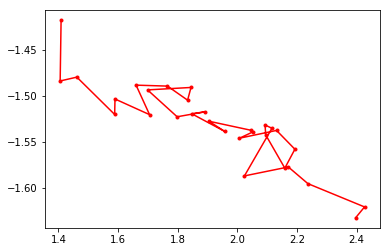

In [73]:
# taket the egien values corresponding to selected neurons
Eigen_img = np.array(Eigen_img)
Eigen_real_max = np.array(Eigen_real_max)
Eigen_real_min = np.array(Eigen_real_min)
plt.plot(Eigen_img[0].ravel(), Eigen_real_min[0].ravel(), 'r.-')

### Performance compare 

In [21]:
# Performance_s_early_abs = np.load('performance_s_early_abs.npy')
# Performance_l_early_3 = np.load('performance_l_early_net_3.npy')
Performance_echo_abs = np.load('Performance_echo_position.npy')[0]
Performance_echo_abs.shape

(5, 6)

In [5]:
Performance_exxl = np.concatenate((Performance_exxl_late_1[0], Performance_exxl_late_2[0], Performance_exxl_late_3[0]), axis = 0)
Performance_exl = np.concatenate((Performance_exl_late_1[0], Performance_exl_late_2[0], Performance_exl_late_3[0]), axis = 0)
Performance_l = np.concatenate((Performance_l_late_1[0], Performance_l_late_2[0], Performance_l_late_3[0]), axis = 0)
Performance_m = np.concatenate((Performance_m_late_1[0], Performance_m_late_2[0], Performance_m_late_3[0]), axis = 0)
Performance_s = np.concatenate((Performance_s_late_1[0], Performance_s_late_2[0], Performance_s_late_3[0]), axis = 0)

### Pretrained Net
draw pictures about the echo state and largest training samples performance evolution & generalization   Add path integrator or position network 

In [11]:
# select 
Performance_pre2 = np.load('Performance_scales_49.npy').reshape(6, 5)[:, 3 * [True] + [False] + [True]]
Performance_pre2.shape
np.std(Performance_pre2, axis = 1).shape

(6,)

In [12]:
PG = np.load('PG_Scaling_PosNet.npy')

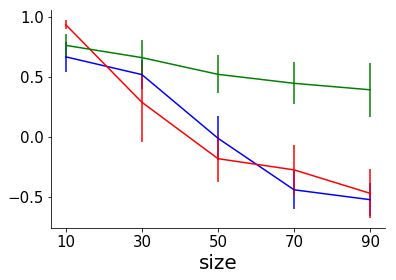

In [31]:
ax = subplot(1, 1, 1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
Performance_echo_abs = np.load('Performance_echo_position.npy')[0]
Performance_exxxl = np.concatenate((Performance_exxxl_late_1, Performance_exxxl_late_2, Performance_exxxl_late_3), axis = 0)
Performance_exxl = np.concatenate((Performance_exxl_late_1, Performance_exxl_late_2, Performance_exxl_late_3), axis = 0)
Performance_exl = np.concatenate((Performance_exl_late_1, Performance_exl_late_2, Performance_exl_late_3), axis = 0)
Performance_l = np.concatenate((Performance_l_late_1, Performance_l_late_2, Performance_l_late_3), axis = 0)
Performance_m = np.concatenate((Performance_m_late_1, Performance_m_late_2, Performance_m_late_3), axis = 0)
Performance_s = np.concatenate((Performance_s_late_1, Performance_s_late_2, Performance_s_late_3), axis = 0)
yerr = [np.std(Performance_s[0]), np.std(Performance_m[0]), np.std(Performance_l[0]),np.std(Performance_exl[0]), np.std(Performance_exxl[0])]
y = [np.mean(Performance_s[0]), np.mean(Performance_m[0]), np.mean(Performance_l[0]),np.mean(Performance_exl[0]), np.mean(Performance_exxl[0])]
x = [10, 30, 50, 70, 90]
plt.errorbar(x, y, yerr = yerr, color = 'b', label = 'echo state network')
net = 29
yerr = [np.std(Performance_s[net]), np.std(Performance_m[net]), np.std(Performance_l[net]),np.std(Performance_exl[net]), np.std(Performance_exxl[net])]
y = [np.mean(Performance_s[net]), np.mean(Performance_m[net]), np.mean(Performance_l[net]),np.mean(Performance_exl[net]), np.mean(Performance_exxl[net])]

PG = np.load('PG_Scaling_PosNet_2.npy')
plt.errorbar(np.arange(10, 91, 20), np.mean(PG, axis = 1), yerr = np.std(PG, axis = 1), color = 'r')
y = np.mean(Performance_pre2, axis = 1)
yerr = np.std(Performance_pre2, axis = 1)
plt.errorbar(x, y[:-1], yerr = yerr[:-1], color = 'g', label = 'pretrained network2')

# plt.legend()
plt.xlabel('size', size = 20)
# plt.ylabel('performance')
plt.xticks([10, 30, 50, 70, 90], size = 15)
plt.yticks([-0.5, 0, 0.5, 1], size = 15)
plt.savefig('performance_compare_g', dpi = 400)
# plt.xlim(0, 100)

In [32]:
trial = 0
Performance_vary_0 = []
for i in range(5):
    performance = []
    for j in range(11):
        if j == 0:
            Pretest = PretrainTest(weight_write = 'weights_cpu1/rnn_1515tanh512_checkpoint{}'.format(trial))
            Pretest.TestAllSizes(size_range = [10], limit_set = 4, test_size = 0)
            performance.append(Pretest.Performance)
        if j>0:
            Pretest = PretrainTest(weight_write = 'weights_net1/weights2/rnn_1515tanh512_checkpoint{}_{}_{}'.format(trial, i, j-1))
            Pretest.TestAllSizes(size_range = [10], limit_set = 4, test_size = 0)
            performance.append(Pretest.Performance)
    print (performance)
    Performance_vary_0.append(performance)

[[-0.8925320512820514], [-0.276161397417154], [-0.09170005988020694], [-0.020225183180845346], [-0.010158724499900995], [0.2895542944985499], [0.6239968908654344], [0.7321532083046776], [0.6944491242631095], [0.794728746903836], [0.9052109454448052]]
[[-0.7795937514867799], [-0.22213658042138829], [-0.20070589112601936], [0.4303042072132129], [0.6536627818306373], [0.42152118492447066], [0.6162802607747515], [0.587489429143454], [0.7231393127324409], [0.5919330852288874], [0.6484290591610853]]
[[-0.8537521560452375], [0.0033391157537088906], [0.4289477762200611], [0.16254270497586054], [0.7546698642128569], [0.7543514113595353], [0.9010957613665139], [0.7234598468491811], [0.7322580345461678], [0.6166415546772557], [0.5031027459977924]]
[[-0.8395069461114719], [0.19617293711815256], [0.21624424962838507], [0.469371908132103], [0.547481107693903], [0.8034927803309978], [0.7050827883905902], [0.8954265024246053], [0.7567897915150776], [0.5415222992001942], [0.5488817236373538]]
[[-0.7495

In [34]:
np.save('Performance_10_0', Performance_vary_0)

In [33]:
trial = 39
Performance_vary_39 = []
for i in range(5):
    performance = []
    for j in range(11):
        if j == 0:
            Pretest = PretrainTest(weight_write = 'weights_cpu1/rnn_1515tanh512_checkpoint{}'.format(trial))
            Pretest.TestAllSizes(size_range = [10], limit_set = 4, test_size = 0)
            performance.append(Pretest.Performance)
        if j>0:
            Pretest = PretrainTest(weight_write = 'weights_net1/weights2/rnn_1515tanh512_checkpoint{}_{}_{}'.format(trial, i, j-1))
            Pretest.TestAllSizes(size_range = [10], limit_set = 4, test_size = 0)
            performance.append(Pretest.Performance)
    print (performance)
    Performance_vary_39.append(performance)
np.save('Performance_10_39', Performance_vary_39)

[[-0.8104375], [0.40701695384685016], [0.8360550556565816], [0.8066604717340438], [0.7371586207991374], [0.7488874456609358], [0.8462262471451895], [0.8674799921471466], [0.5405815038542434], [0.7508068556985219], [0.7624613138927179]]
[[-0.7803017241379311], [0.21129480150290553], [0.49202798877043474], [0.4945751044152975], [0.6585296405875443], [0.7432052888170468], [0.6036127588448528], [0.7951953530142896], [0.9108939153499631], [0.6788927849916719], [0.6012311585666981]]
[[-0.78], [0.18600123746324806], [0.6003406471866324], [0.5942847432575018], [0.6415618334178181], [0.844077395698209], [0.5941229265264517], [0.7728312372026551], [0.6436762614260562], [0.5166054900550175], [0.797933077543154]]
[[-0.7418951612903226], [0.3524775379358217], [-0.19233415570175438], [0.5935046181320793], [0.7522077602006361], [0.5892383489007165], [0.6221155516117782], [0.7885085756631427], [0.9156571651604142], [0.7754981146762698], [0.6135335808230649]]
[[-0.85], [0.6212989686893718], [0.59676913

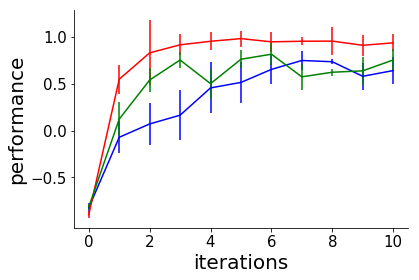

In [28]:
ax = subplot(1, 1, 1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
Performance_vary_0 = np.load('Performance_10_0.npy')
Performance_pos = np.load('Performance_pos.npy')
plt.errorbar(x = np.arange(11), y = np.mean(Performance_vary_0, axis = 0), yerr = np.std(Performance_vary_0, axis = 0), color = 'b')
# Performance_vary_39 = np.load('Performance_10_39.npy')
# plt.errorbar(x = np.arange(11), y = np.mean(Performance_vary_39, axis = 0), yerr = np.std(Performance_vary_39, axis = 0), color = 'r')

plt.errorbar(x = np.arange(11), y = np.mean(Performance_pos,  axis = 0), yerr = np.std(Performance_vary_39, axis = 0), color = 'r')
Performance_vary_49 = np.load('Performance_10_49.npy').reshape(5, 11)[3 * [True] + [False] + [True],:]
plt.errorbar(x = np.arange(11), y = np.mean(Performance_vary_49, axis = 0), yerr = np.std(Performance_vary_49, axis = 0), color = 'g')
# Performance_vary_abs = np.load('Performance_vary_abs.npy')
# plt.errorbar(x = np.arange(11), y = np.mean(Performance_vary_abs, axis = 0), yerr = np.std(Performance_vary_abs, axis = 0), color = 'k', alpha = 0.5)
plt.yticks([-0.5, 0, 0.5, 1], size = 15)
plt.xticks(size = 15)
plt.xlabel('iterations', size = 20)
plt.ylabel('performance', size = 20)
plt.savefig('performance_compare', dpi = 400)

In [32]:
Performance_vary_49.shape

(5, 11, 1)

### Echo state vs performance

### Spetrum

([<matplotlib.axis.XTick at 0x7f28a38d8ba8>,
 <a list of 4 Text xticklabel objects>)

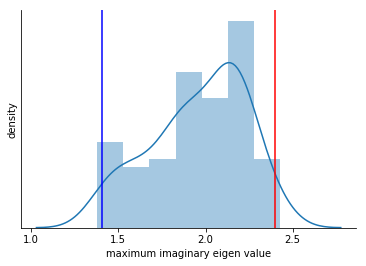

In [50]:
ax = subplot(1, 1, 1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
Eigen_img = np.load('Eigen_img.npy')
sns.distplot(np.array(Eigen_img).ravel())
plt.plot(Eigen_img[0][0] * np.ones(10), np.linspace(0, 40, 10), color = 'b')
plt.plot(Eigen_img[0][-1] * np.ones(10), np.linspace(0, 40, 10), color = 'r')
plt.xlabel('maximum imaginary eigen value')
plt.ylabel('density')
plt.yticks([])
plt.xticks([1, 1.5, 2, 2.5])

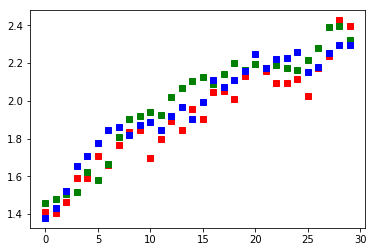

In [52]:
plt.plot(Eigen_img[0], 'rs')
plt.plot(Eigen_img[1], 'gs')
plt.plot(Eigen_img[2], 'bs')

In [76]:
Eig_i = []
Eig_img = np.load('Eigen_img.npy').ravel()
for eig in Eig_img:
    Eig_i.append(eig * ones(5))
Eig_i = np.array(Eig_i).reshape(450)
Eig_i.shape

(450,)

In [74]:
Eig_r = []
Eig_real = np.load('Eigen_real_min.npy').ravel()
for eig in Eig_real:
    Eig_r.append(eig * ones(5))
Eig_r = np.array(Eig_r).reshape(450)
Eig_r.shape

(450,)

[[1.        0.6387829]
 [0.6387829 1.       ]]
[[1.         0.54127112]
 [0.54127112 1.        ]]
[[1.         0.40464717]
 [0.40464717 1.        ]]
[[1.         0.33713129]
 [0.33713129 1.        ]]
[[1.         0.31952775]
 [0.31952775 1.        ]]


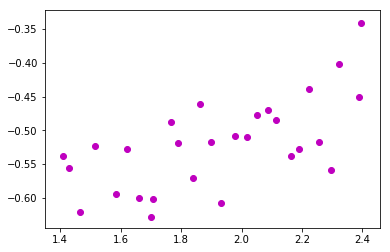

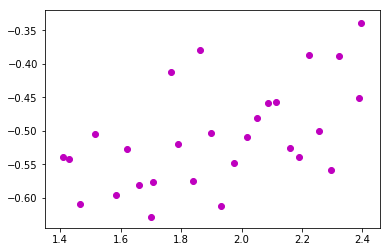

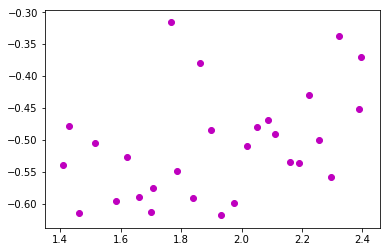

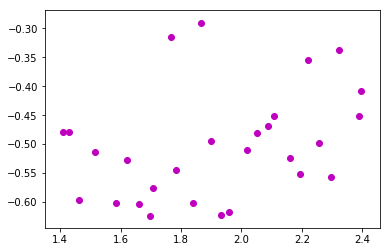

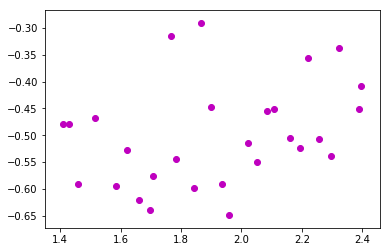

In [79]:
for i in range(5):
    threshold1 = 0.2 + 0.05 * i
    threshold2 = threshold1 + 1
    Performance_m_late = np.concatenate((Performance_m_late_1, Performance_m_late_2, Performance_m_late_3), axis = 0).ravel()
    index = (Performance_m_late>threshold1)
    Performance_exxl_late = np.concatenate((Performance_exxl_late_1, Performance_exxl_late_2, Performance_exxl_late_3), axis = 0).ravel()
    P_90_select = Performance_exxl_late[index]
    Eig_select = Eig_i[index]
    values = np.linspace(Eig_select.min(), Eig_select.max(), 30)
    eig = []
    per = []
    for v0, v1 in zip(values[:-1], values[1:]):
        index = (Eig_select>v0) & (Eig_select<v1)
        plt.figure(i)
        plt.scatter(np.mean(Eig_select[index]), np.mean(P_90_select[index]), color = 'm')
        if np.isnan(np.mean(P_90_select[index])) == False:
            eig.append(np.mean(Eig_select[index]))
            per.append(np.mean(P_90_select[index]))
    eig = np.array(eig)
    per = np.array(per)
    print (np.corrcoef(eig, per))

In [54]:
for i in range(10):
    threshold1 = 0.2
    Performance_m_late = np.concatenate((Performance_m_late_1, Performance_m_late_2, Performance_m_late_3), axis = 0).ravel()
    Performance_exl_late = np.concatenate((Performance_exl_late_1, Performance_exl_late_2, Performance_exl_late_3), axis = 0).ravel()
    Performance_exxxl_late = np.concatenate((Performance_exxxl_late_1, Performance_exxxl_late_2, Performance_exxxl_late_3), axis = 0).ravel()
    index = (Performance_m_late>threshold1)
    Performance_exxl_late = np.concatenate((Performance_exxl_late_1, Performance_exxl_late_2, Performance_exxl_late_3), axis = 0).ravel()
    P_90_select = (Performance_exl_late[index]+ Performance_exxl_late[index] + Performance_exxxl_late[index])/3
    P_90_select = Performance_exxl_late[index]
    Eig_select = Eig_i[index]
    if i == 0:
        print (' whole correlation', np.corrcoef(P_90_select, Eig_select)[0][1])
    values = np.linspace(Eig_select.min(), Eig_select.max(), 10 + 5 * i)
    eig = []
    per = []
    for v0, v1 in zip(values[:-1], values[1:]):
        index2 = (Eig_select>v0) & (Eig_select<v1)
        if np.isnan(np.mean(P_90_select[index2])) == False:
            eig.append(np.mean(Eig_select[index2]))
            per.append(np.mean(P_90_select[index2]))
    eig = np.array(eig)
    per = np.array(per)
    print ('averaged correlation', np.corrcoef(eig, per)[0][1])
    

 whole correlation 0.25198728107802076
averaged correlation 0.8325904438794549
averaged correlation 0.7594699141073648
averaged correlation 0.7123171498202172
averaged correlation 0.6534766275383357
averaged correlation 0.6387828982824031
averaged correlation 0.6702830495277041
averaged correlation 0.6519078098071756
averaged correlation 0.5727056116877713
averaged correlation 0.6291454438122166
averaged correlation 0.43199202747819127


 whole correlation 0.24797429928129952
averaged correlation 0.71102710231545


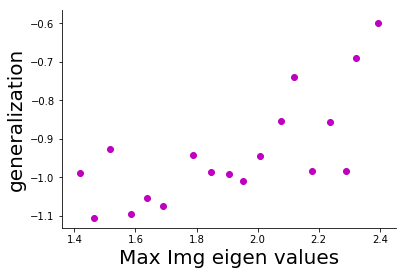

In [60]:
ax = subplot(1, 1, 1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
for i in range(1):
    threshold1 = 0.2 + 0.05 * i
    threshold2 = threshold1 + 1
    Performance_m_late = np.concatenate((Performance_m_late_1, Performance_m_late_2, Performance_m_late_3), axis = 0).ravel()
    Performance_exl_late = np.concatenate((Performance_exl_late_1, Performance_exl_late_2, Performance_exl_late_3), axis = 0).ravel()
    Performance_exxxl_late = np.concatenate((Performance_exxxl_late_1, Performance_exxxl_late_2, Performance_exxxl_late_3), axis = 0).ravel()
    index = (Performance_m_late>threshold1)
    Performance_exxl_late = np.concatenate((Performance_exxl_late_1, Performance_exxl_late_2, Performance_exxl_late_3), axis = 0).ravel()
#     P_90_select = (Performance_exl_late[index]+ Performance_exxl_late[index] + Performance_exxxl_late[index])/3
    P_90_select = Performance_exxl_late[index] + Performance_exl_late[index]
    Eig_select = Eig_i[index]
    print (' whole correlation', np.corrcoef(P_90_select, Eig_select)[0][1])
    values = np.linspace(Eig_select.min(), Eig_select.max(), 20)
    eig = []
    per = []
    for v0, v1 in zip(values[:-1], values[1:]):
        index2 = (Eig_select>v0) & (Eig_select<v1)
#         plt.figure(i)
        ax.scatter(np.mean(Eig_select[index2]), np.mean(P_90_select[index2]), color = 'm')
        plt.xlabel('Max Img eigen values', size = 20)
        plt.ylabel('generalization', size = 20)
#         plt.yticks([-0.7, -0.5, -0.3])
#         plt.xticks([1, 1.5, 2, 2.5])
        if np.isnan(np.mean(P_90_select[index2])) == False:
            eig.append(np.mean(Eig_select[index2]))
            per.append(np.mean(P_90_select[index2]))
    eig = np.array(eig)
    per = np.array(per)
    print ('averaged correlation', np.corrcoef(eig, per)[0][1])
plt.savefig('eig_per', dpi = 400)   

In [34]:
np.where(Eig_select>v0)[0]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

0 0 0
1.4010317 1.4583032 1.3786793
1 1 1
1.4032145 1.4838058 1.4193485
2 2 2
1.4776858 1.5110003 1.5227761
3 3 3
1.5889587 1.5219119 1.6462492
4 4 4
1.5637841 1.6297406 1.7066722
5 5 5
1.680588 1.612692 1.7772946
6 6 6
1.6786247 1.6628159 1.8378097
7 7 7
1.7926191 1.7985644 1.8794559
8 8 8
1.8296285 1.8930473 1.836492
9 9 9
1.8208643 1.9172511 1.8489316
10 10 10
1.7503967 1.9566517 1.8788718
11 11 11
1.8466933 1.9658144 1.8372799
12 12 12
1.8523068 2.0197282 1.9115838
13 13 13
1.8901123 2.079756 1.9826157
14 14 14
1.9586653 2.1212907 1.9236577
15 15 15
1.9147304 2.1356878 2.0245323
17 17 17
2.0698516 2.0970693 2.1246567
19 19 19
2.0628717 2.1639543 2.083449
21 21 21
2.0143414 2.2075229 2.141246
23 23 23
2.069799 2.1561506 2.1755228
25 25 25
2.1592758 2.2053738 2.261199
27 26 27
2.1312175 2.2020822 2.1790454
29 27 29
2.051279 2.19709 2.2444265
30 28 31
2.0924163 2.1851215 2.2746696
31 29 33
2.0833573 2.207561 2.1929352
32 31 35
2.0340607 2.2176528 2.1511698
33 33 36
2.1556187 2.267039 

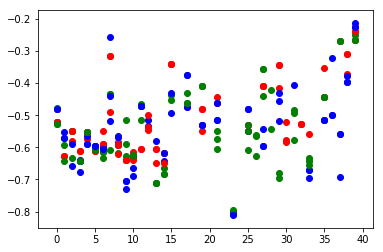

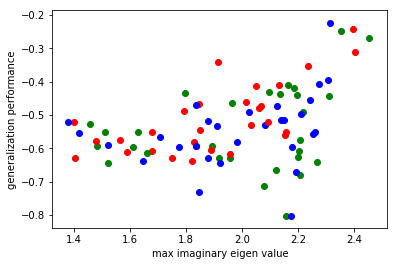

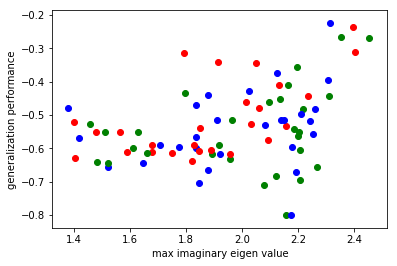

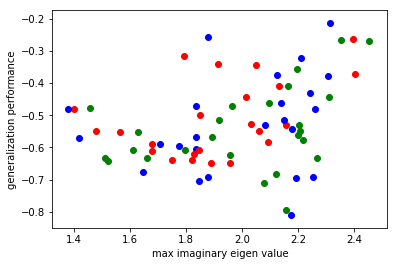

In [48]:
n = 2
m = -1
for i in range(3):
    threshold1 = 0.2 + 0.1 * i
    threshold2 = threshold1 + 1
    Per = []
    Eg = []
    for n in range(30):
        # select the best 
        index1 = Performance_m_late_1[n]>threshold1
        index2 = Performance_m_late_2[n]>threshold1
        index3 = Performance_m_late_3[n]>threshold1
        
        p1 = np.mean(Performance_exxl_late_1[n][index1])
        p2 = np.mean(Performance_exxl_late_1[n][index2])
        p3 = np.mean(Performance_exxl_late_1[n][index3])
        plt.figure(0)
        plt.scatter(neurons1[n], p1, color = 'r')
        plt.scatter(neurons2[n], p2, color = 'g')
        plt.scatter(neurons3[n], p3, color = 'b')
        if i == 0:
            print (neurons1[n], neurons2[n], neurons3[n])
            print (Eigen_img[0][n], Eigen_img[1][n], Eigen_img[2][n])
        plt.figure(1+i)
        plt.scatter(Eigen_img[0][n], p1, color = 'r')
        plt.scatter(Eigen_img[1][n], p2, color = 'g')
        plt.scatter(Eigen_img[2][n], p3, color = 'b')
        plt.xlabel('max imaginary eigen value')
        plt.ylabel('generalization performance')
#         Per.append(np.mean(Performance_exxl[(Performance_m>threshold1) & (Performance_m<threshold2)]))
#         Eg.append(1/3*np.mean(Eigen_img[0][n:m] + Eigen_img[1][n:m] + Eigen_img[2][n:m]))
# #     print (Per)
#     print (np.corrcoef(np.array(Eg), np.array(Per))[0][1])
#     #     plt.scatter(Eigen_img_0[0][neurons1[n:m]] + Eigen_img_0[1][neurons2[n:m]] + Eigen_img_0[2][neurons3[n:m]], np.mean(Performance_exxl[(Performance_m>threshold1) & (Performance_m<threshold2)]))

### Limit Cycle Ratio

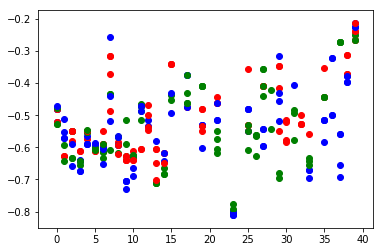

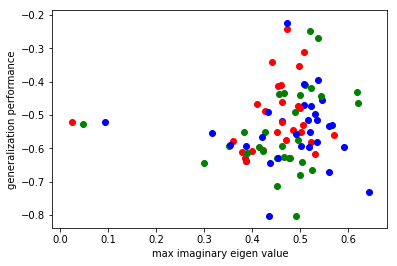

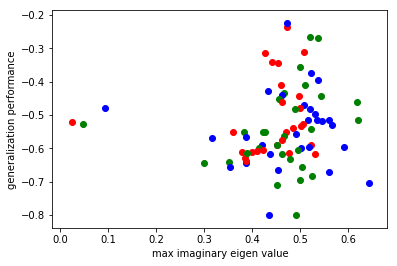

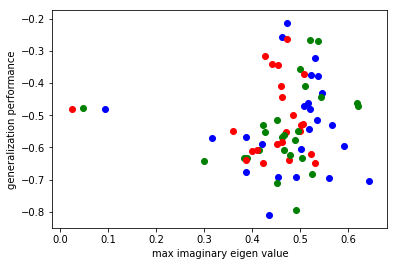

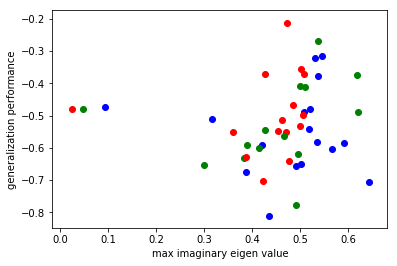

In [113]:
Rc1 = np.load('Ratio.npy')
Rc2 = np.load('Ratio_2.npy')
Rc3 = np.load('Ratio_3.npy')
for i in range(4):
    threshold1 = 0.2 + 0.1 * i
    threshold2 = threshold1 + 1
    Per = []
    Eg = []
    for n in range(30):
#         print (neurons1[n:m], neurons2[n:m], neurons3[n:m])
#         print (Eigen_img[0][n], Eigen_img[1][n], Eigen_img[2][n])


        index1 = Performance_m_late_1[n]>threshold1
        index2 = Performance_m_late_2[n]>threshold1
        index3 = Performance_m_late_3[n]>threshold1
        
        p1 = np.mean(Performance_exxl_late_1[n][index1])
        p2 = np.mean(Performance_exxl_late_1[n][index2])
        p3 = np.mean(Performance_exxl_late_1[n][index3])
        plt.figure(0)
        plt.scatter(neurons1[n], p1, color = 'r')
        plt.scatter(neurons2[n], p2, color = 'g')
        plt.scatter(neurons3[n], p3, color = 'b')
        plt.figure(1+i)
        plt.scatter(Rc1[neurons1[n]], p1, color = 'r')
        plt.scatter(Rc2[neurons2[n]], p2, color = 'g')
        plt.scatter(Rc3[neurons3[n]], p3, color = 'b')
#         plt.xlim(0.3, 0.6)
        plt.xlabel('max imaginary eigen value')
        plt.ylabel('generalization performance')

### Decoding

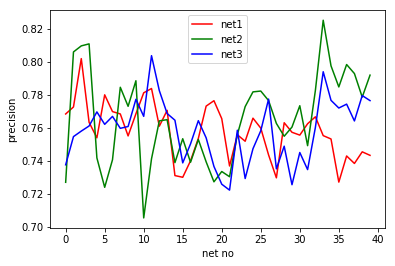

In [31]:
Decode = np.load('Decode_init_all2.npy')
precision_l1 = np.array([1-pre/15 for pre in Decode[0]])
precision_l2 = np.array([1-pre/15 for pre in Decode[1]])
precision_l3 = np.array([1-pre/15 for pre in Decode[2]])
plt.plot(precision_l1, 'r', label = 'net1')
plt.plot(precision_l2, 'g', label = 'net2')
plt.plot(precision_l3, 'b', label = 'net3')
plt.xlabel('net no')
plt.ylabel('precision')
plt.legend()

([], <a list of 0 Text yticklabel objects>)

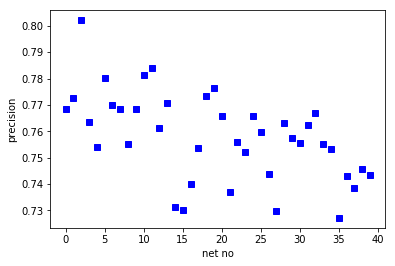

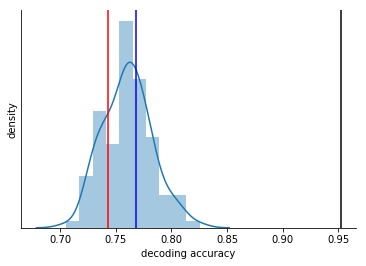

In [32]:
decode_abs = 0.3578986447918484
precision_abs = 1- 2 * decode_abs/15
Decode = np.load('Decode_init_all2.npy')
precision_l1 = np.array([1-pre/15 for pre in Decode[0]])
plt.plot(precision_l1, 'bs', label = 'net1')
plt.xlabel('net no')
plt.ylabel('precision')
plt.figure()
precision_l = np.array([1-pre/15 for pre in Decode.ravel()])
ax = subplot(1, 1, 1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
sns.distplot(precision_l.ravel(), norm_hist = True)
plt.plot(precision_l[0] * np.ones(10), np.linspace(0, 40, 10), color = 'b')
plt.plot(precision_l[39] * np.ones(10), np.linspace(0, 40, 10), color = 'r')
plt.plot(precision_abs * np.ones(10), np.linspace(0, 40, 10), color = 'k')
plt.xlabel('decoding accuracy')
plt.ylabel('density')
plt.yticks([])
# plt.xticks([1, 1.5, 2, 2.5])

In [33]:
Prec = np.concatenate((precision_l1[neurons1], precision_l2[neurons2], precision_l3[neurons3]), axis = 0) 
Precision = []
for prec in Prec:
    Precision.append(prec * ones(5))
Precision = np.array(Precision).reshape(450)
Precision.shape

(450,)

[[ 1.         -0.01264999]
 [-0.01264999  1.        ]]
[[1.        0.0418592]
 [0.0418592 1.       ]]
[[1.         0.11682268]
 [0.11682268 1.        ]]
[[1.         0.16206713]
 [0.16206713 1.        ]]
[[1.         0.18346443]
 [0.18346443 1.        ]]


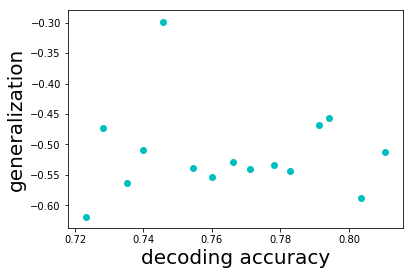

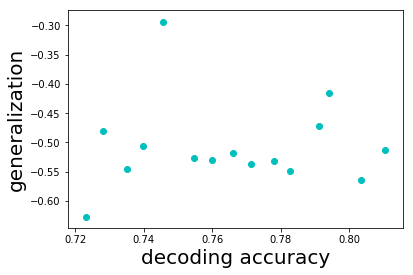

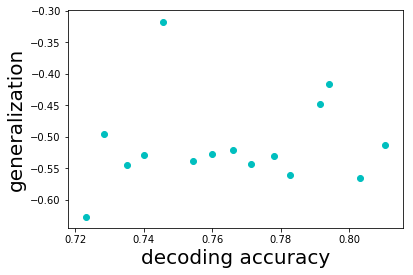

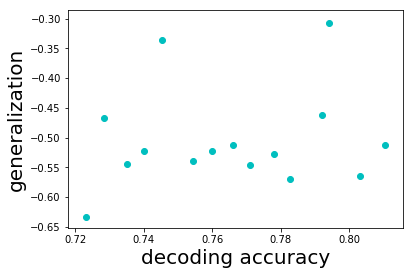

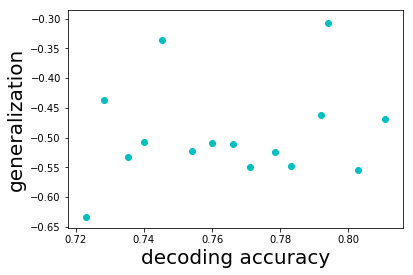

In [35]:
for i in range(5):
    threshold1 = 0.2 + 0.05 * i
    threshold2 = threshold1 + 1
    Performance_m_late = np.concatenate((Performance_m_late_1, Performance_m_late_2, Performance_m_late_3), axis = 0).ravel()
    index = (Performance_m_late>threshold1)
    Performance_exxl_late = np.concatenate((Performance_exxl_late_1, Performance_exxl_late_2, Performance_exxl_late_3), axis = 0).ravel()
    P_90_select = Performance_exxl_late[index]
    Prec_select = Precision[index]
    values = np.linspace(Prec.min(), Prec.max(), 20)
    dec = []
    per = []
    for v0, v1 in zip(values[:-1], values[1:]):
        index = (Prec_select>v0) & (Prec_select<v1)
        plt.figure(i)
        plt.scatter(np.mean(Prec_select[index]), np.mean(P_90_select[index]), color = 'c')
        plt.xlabel('decoding accuracy', size = 20)
        plt.ylabel('generalization', size = 20)
        if np.isnan(np.mean(P_90_select[index])) == False:
            per.append(np.mean(P_90_select[index]))
            dec.append(np.mean(Prec_select[index]))
#             print (np.mean(P_90_select[index]), np.mean(Prec_select[index]))
    dec = np.array(dec)
    per = np.array(per)
    print (np.corrcoef(dec, per))

 whole correlation 0.24716777319456415
averaged correlation 0.7735477325223115
averaged correlation 0.6896901568852467
averaged correlation 0.5086378718875473
averaged correlation 0.584197387720488
averaged correlation 0.5553754903286545
averaged correlation 0.4837529279850882
averaged correlation 0.4343774835771176
averaged correlation 0.5015911155840782
averaged correlation 0.40978684541015686
averaged correlation 0.41314014564268303
averaged correlation 0.43162602104675807
averaged correlation 0.418910786572723
averaged correlation 0.3338523607963489
averaged correlation 0.37468813856706396
averaged correlation 0.3347835006495243
averaged correlation 0.388669860111132
averaged correlation 0.36658734724703906
averaged correlation 0.368380634988822
averaged correlation 0.3692733121639241
averaged correlation 0.34261303402655935
 whole correlation -0.034917756821593565
-0.1724099208183082
0.038730813683371036
-0.24391595310487796
-0.11950898845110278
-0.03749217152147604
-0.14965834728

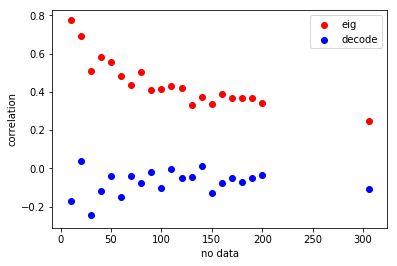

In [65]:
threshold1 = 0.2
Performance_m_late = np.concatenate((Performance_m_late_1, Performance_m_late_2, Performance_m_late_3), axis = 0).ravel()
Performance_exl_late = np.concatenate((Performance_exl_late_1, Performance_exl_late_2, Performance_exl_late_3), axis = 0).ravel()
Performance_exxxl_late = np.concatenate((Performance_exxxl_late_1, Performance_exxxl_late_2, Performance_exxxl_late_3), axis = 0).ravel()
index = (Performance_m_late>threshold1)
Performance_exxl_late = np.concatenate((Performance_exxl_late_1, Performance_exxl_late_2, Performance_exxl_late_3), axis = 0).ravel()
P_90_select = (Performance_exl_late[index]+ Performance_exxl_late[index] + Performance_exxxl_late[index])/3
Eig_select = Eig[index]
print (' whole correlation', np.corrcoef(P_90_select, Eig_select)[0][1])
plt.scatter(len(P_90_select),  np.corrcoef(P_90_select, Eig_select)[0][1], color = 'r', label = 'eig')
for i in range(20):
    values = np.linspace(Eig_select.min(), Eig_select.max(), 10 + 10 * i)
    eig = []
    per = []
    for v0, v1 in zip(values[:-1], values[1:]):
        index2 = (Eig_select>v0) & (Eig_select<v1)
        if np.isnan(np.mean(P_90_select[index2])) == False:
            eig.append(np.mean(Eig_select[index2]))
            per.append(np.mean(P_90_select[index2]))
    eig = np.array(eig)
    per = np.array(per)
    print ('averaged correlation', np.corrcoef(eig, per)[0][1])
    plt.scatter(10 + 10 * i, np.corrcoef(eig, per)[0][1], color = 'r')
threshold1 = 0.2 
threshold2 = threshold1 + 1
Performance_m_late = np.concatenate((Performance_m_late_1, Performance_m_late_2, Performance_m_late_3), axis = 0).ravel()
index = (Performance_m_late>threshold1)
Performance_exxxl_late = np.concatenate((Performance_exxxl_late_1, Performance_exxxl_late_2, Performance_exxxl_late_3), axis = 0).ravel()
P_150_select = (Performance_exl_late[index] + Performance_exxl_late[index] + Performance_exxxl_late[index])/3
Prec_select = Precision[index]
print (' whole correlation', np.corrcoef(Prec_select, P_150_select)[0][1])
plt.scatter(len(P_90_select),  np.corrcoef(Prec_select, Eig_select)[0][1], color = 'b', label = 'decode')
for i in range(20):
  
    values = np.linspace(Prec.min(), Prec.max(), 10 + 10 * i)
    dec = []
    per = []
    for v0, v1 in zip(values[:-1], values[1:]):
        index = (Prec_select>v0) & (Prec_select<v1)
        if np.isnan(np.mean(P_150_select[index])) == False:
            per.append(np.mean(P_150_select[index]))
            dec.append(np.mean(Prec_select[index]))
#             print (np.mean(P_150_select[index]), np.mean(Prec_select[index]))
    dec = np.array(dec)
    per = np.array(per)
    print (np.corrcoef(dec, per)[0][1])
    plt.scatter(10 + 10 * i, np.corrcoef(dec, per)[0][1], color = 'b')
    plt.xlabel('no data')
    plt.ylabel('correlation')
    plt.legend()

 whole correlation -0.034917756821593565
0.038730813683371036


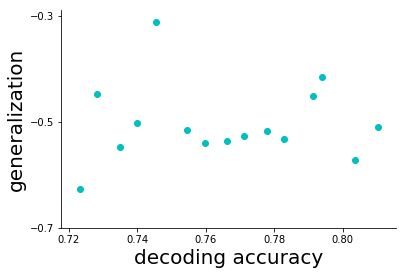

In [83]:
ax = subplot(1, 1, 1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
for i in range(1):
    threshold1 = 0.2 + 0.05 * i
    threshold2 = threshold1 + 1
    Performance_m_late = np.concatenate((Performance_m_late_1, Performance_m_late_2, Performance_m_late_3), axis = 0).ravel()
    index = (Performance_m_late>threshold1)
    Performance_exxxl_late = np.concatenate((Performance_exxxl_late_1, Performance_exxxl_late_2, Performance_exxxl_late_3), axis = 0).ravel()
    P_150_select = (Performance_exl_late[index] + Performance_exxl_late[index] + Performance_exxxl_late[index])/3
    Prec_select = Precision[index]
    print (' whole correlation', np.corrcoef(Prec_select, P_150_select)[0][1])
    values = np.linspace(Prec.min(), Prec.max(), 20)
    dec = []
    per = []
    for v0, v1 in zip(values[:-1], values[1:]):
        index = (Prec_select>v0) & (Prec_select<v1)
        ax.scatter(np.mean(Prec_select[index]), np.mean(P_150_select[index]), color = 'c')
        plt.xlabel('decoding accuracy', size = 20)
        plt.ylabel('generalization', size = 20)
#         plt.yticks([])
        plt.yticks([-0.7, -0.5, -0.3])
        if np.isnan(np.mean(P_150_select[index])) == False:
            per.append(np.mean(P_150_select[index]))
            dec.append(np.mean(Prec_select[index]))
#             print (np.mean(P_150_select[index]), np.mean(Prec_select[index]))
    dec = np.array(dec)
    per = np.array(per)
    print (np.corrcoef(dec, per)[0][1])
plt.savefig('dec_per', dpi = 400)

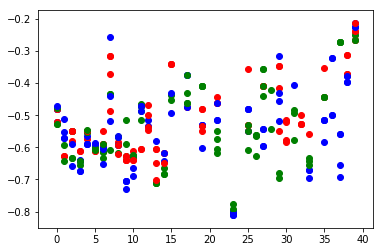

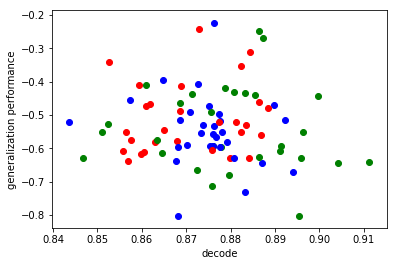

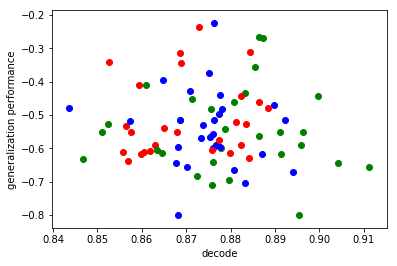

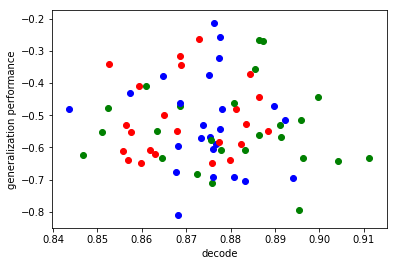

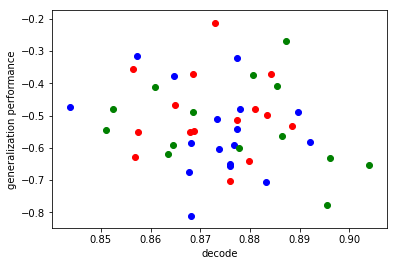

In [118]:
for i in range(4):
    threshold1 = 0.2 + 0.1 * i
    threshold2 = threshold1 + 1
    Per = []
    Eg = []
    for n in range(30):
        index1 = Performance_m_late_1[n]>threshold1
        index2 = Performance_m_late_2[n]>threshold1
        index3 = Performance_m_late_3[n]>threshold1
        
        p1 = np.mean(Performance_exxl_late_1[n][index1])
        p2 = np.mean(Performance_exxl_late_1[n][index2])
        p3 = np.mean(Performance_exxl_late_1[n][index3])
        plt.figure(0)
        plt.scatter(neurons1[n], p1, color = 'r')
        plt.scatter(neurons2[n], p2, color = 'g')
        plt.scatter(neurons3[n], p3, color = 'b')
        plt.figure(1+i)
        plt.scatter(precision_l1[neurons1[n]], p1, color = 'r')
        plt.scatter(precision_l2[neurons2[n]], p2, color = 'g')
        plt.scatter(precision_l3[neurons3[n]], p3, color = 'b')
        plt.xlabel('decode')
        plt.ylabel('generalization performance')

### Averaged conditoned on eigen value

n = 2
m = -1
for i in range(4):
    threshold1 = 0.4 +0.1 * i
    threshold2 = threshold1 + 1
    Per = []
    Eg = []
    for n in range(30):
        m = n + 1
#         print (neurons1[n:m], neurons2[n:m], neurons3[n:m])
#         print (Eigen_img[0][n:m], Eigen_img[1][n:m], Eigen_img[2][n:m])
        Performance_exxl = np.concatenate((Performance_exxl_late_1[n:m], Performance_exxl_late_2[n:m], Performance_exxl_late_3[n:m]), axis = 0)
        Performance_exl = np.concatenate((Performance_exl_late_1[n:m], Performance_exl_late_2[n:m], Performance_exl_late_3[n:m]), axis = 0)
        Performance_l = np.concatenate((Performance_l_late_1[n:m], Performance_l_late_2[n:m], Performance_l_late_3[n:m]), axis = 0)
        Performance_m = np.concatenate((Performance_m_late_1[n:m], Performance_m_late_2[n:m], Performance_m_late_3[n:m]), axis = 0)
        Performance_s = np.concatenate((Performance_s_late_1[n:m], Performance_s_late_2[n:m], Performance_s_late_3[n:m]), axis = 0)
#         print (np.mean(Performance_exxl[(Performance_m>threshold1) & (Performance_m<threshold2)]))
        plt.figure(0)
        plt.scatter(n, np.mean(Performance_exxl[(Performance_s>threshold1) & (Performance_s<threshold2)]))
        plt.figure(1+i)
        plt.scatter(1/3*np.mean(Eigen_img[0][n:m] + Eigen_img[1][n:m] + Eigen_img[2][n:m]), np.mean(Performance_exxl[(Performance_s>threshold1) & (Performance_s<threshold2)]), color = 'r')
        plt.xlabel('max imaginary eigen value')
        plt.ylabel('generalization performance')
        Per.append(np.mean(Performance_exxl[(Performance_s>threshold1) & (Performance_s<threshold2)]))
        Eg.append(1/3*np.mean(Eigen_img[0][n:m] + Eigen_img[1][n:m] + Eigen_img[2][n:m]))
#     print (Per)
    print (np.corrcoef(np.array(Eg), np.array(Per))[0][1])
    #     plt.scatter(Eigen_img_0[0][neurons1[n:m]] + Eigen_img_0[1][neurons2[n:m]] + Eigen_img_0[2][neurons3[n:m]], np.mean(Performance_exxl[(Performance_m>threshold1) & (Performance_m<threshold2)]))

0.5330551487867554
0.5642438603561635
0.40357831844279307
0.27001887487743575


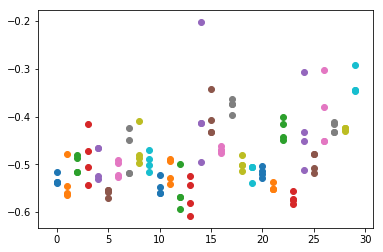

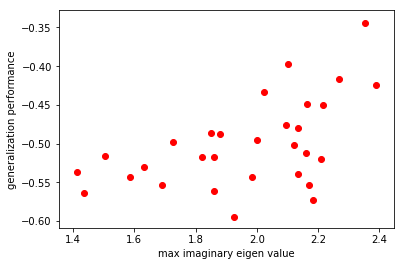

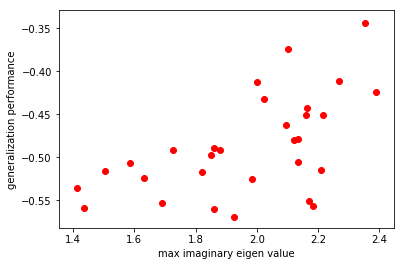

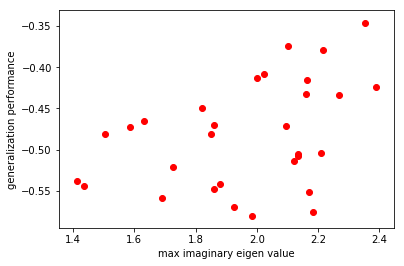

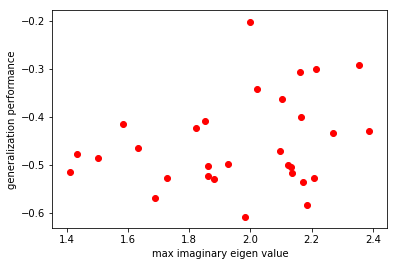

In [100]:
n = 2
m = -1
for i in range(4):
    threshold1 = 0.1 + 0.1 * i
    threshold2 = threshold1 + 1
    Per = []
    Eg = []
    for n in range(30):
        m = n + 1
#         print (neurons1[n:m], neurons2[n:m], neurons3[n:m])
#         print (Eigen_img[0][n:m], Eigen_img[1][n:m], Eigen_img[2][n:m])
        Performance_exxl = np.concatenate((Performance_exxl_late_1[n:m], Performance_exxl_late_2[n:m], Performance_exxl_late_3[n:m]), axis = 0)
        Performance_exl = np.concatenate((Performance_exl_late_1[n:m], Performance_exl_late_2[n:m], Performance_exl_late_3[n:m]), axis = 0)
        Performance_l = np.concatenate((Performance_l_late_1[n:m], Performance_l_late_2[n:m], Performance_l_late_3[n:m]), axis = 0)
        Performance_m = np.concatenate((Performance_m_late_1[n:m], Performance_m_late_2[n:m], Performance_m_late_3[n:m]), axis = 0)
        Performance_s = np.concatenate((Performance_s_late_1[n:m], Performance_s_late_2[n:m], Performance_s_late_3[n:m]), axis = 0)
#         print (np.mean(Performance_exxl[(Performance_m>threshold1) & (Performance_m<threshold2)]))
        plt.figure(0)
        plt.scatter(n, np.mean(Performance_exxl[(Performance_m>threshold1) & (Performance_m<threshold2)]))
        Performance_extra = (Performance_exxl + Performance_exl)/2
        Performance_M = (Performance_s + Performance_m)/2
        plt.figure(1+i)
        plt.scatter(1/3*np.mean(Eigen_img[0][n:m] + Eigen_img[1][n:m] + Eigen_img[2][n:m]), np.mean(Performance_exxl[(Performance_m>threshold1) & (Performance_m<threshold2)]), color = 'r')
        plt.xlabel('max imaginary eigen value')
        plt.ylabel('generalization performance')
        Per.append(np.mean(Performance_exxl[(Performance_m>threshold1) & (Performance_m<threshold2)]))
        Eg.append(1/3*np.mean(Eigen_img[0][n:m] + Eigen_img[1][n:m] + Eigen_img[2][n:m]))
#     print (Per)
    print (np.corrcoef(np.array(Eg), np.array(Per))[0][1])
    #     plt.scatter(Eigen_img_0[0][neurons1[n:m]] + Eigen_img_0[1][neurons2[n:m]] + Eigen_img_0[2][neurons3[n:m]], np.mean(Performance_exxl[(Performance_m>threshold1) & (Performance_m<threshold2)]))

0.5991455932645715
0.6501744630531582
0.6774398844685937
0.4933188176760863


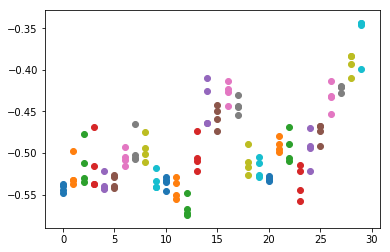

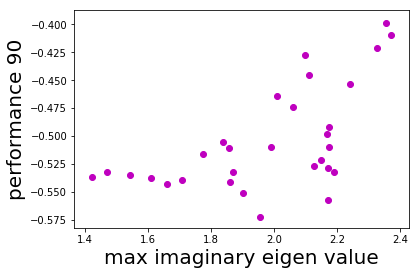

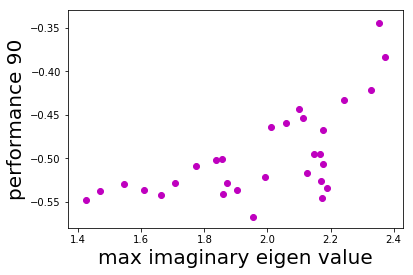

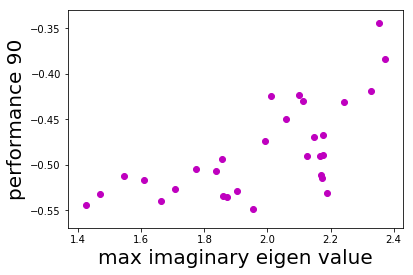

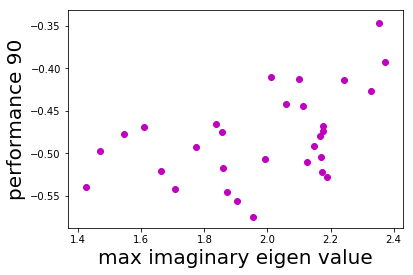

In [10]:
n = 2
m = -1
for i in range(4):
    threshold1 = 0.1 * i
    threshold2 = threshold1 + 1
    Per = []
    Eg = []
    for n in range(30):
        m = n + 2
#         print (neurons1[n:m], neurons2[n:m], neurons3[n:m])
#         print (Eigen_img[0][n:m], Eigen_img[1][n:m], Eigen_img[2][n:m])
        Performance_exxl = np.concatenate((Performance_exxl_late_1[n:m], Performance_exxl_late_2[n:m], Performance_exxl_late_3[n:m]), axis = 0)
        Performance_exl = np.concatenate((Performance_exl_late_1[n:m], Performance_exl_late_2[n:m], Performance_exl_late_3[n:m]), axis = 0)
        Performance_l = np.concatenate((Performance_l_late_1[n:m], Performance_l_late_2[n:m], Performance_l_late_3[n:m]), axis = 0)
        Performance_m = np.concatenate((Performance_m_late_1[n:m], Performance_m_late_2[n:m], Performance_m_late_3[n:m]), axis = 0)
        Performance_s = np.concatenate((Performance_s_late_1[n:m], Performance_s_late_2[n:m], Performance_s_late_3[n:m]), axis = 0)
#         print (np.mean(Performance_exxl[(Performance_m>threshold1) & (Performance_m<threshold2)]))
        plt.figure(0)
        plt.scatter(n, np.mean(Performance_exxl[(Performance_m>threshold1) & (Performance_m<threshold2)]))
        Performance_extra = (Performance_exxl + Performance_exl)/2
        Performance_M = (Performance_s + Performance_m)/2
        plt.figure(1+i)
        plt.scatter(1/3*np.mean(Eigen_img[0][n:m] + Eigen_img[1][n:m] + Eigen_img[2][n:m]), np.mean(Performance_exxl[(Performance_m>threshold1) & (Performance_m<threshold2)]), color = 'm')
        plt.xlabel('max imaginary eigen value', size = 20)
        plt.ylabel('performance 90', size = 20)
        Per.append(np.mean(Performance_exxl[(Performance_m>threshold1) & (Performance_m<threshold2)]))
        Eg.append(1/3*np.mean(Eigen_img[0][n:m] + Eigen_img[1][n:m] + Eigen_img[2][n:m]))
#     print (Per)
    print (np.corrcoef(np.array(Eg), np.array(Per))[0][1])

0.6944396213497668
0.7194718624318305
0.7458625341428344
0.6169492486860376


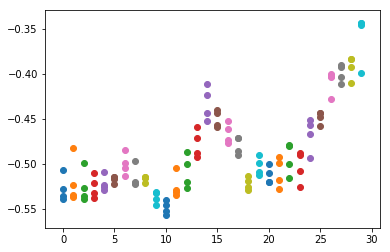

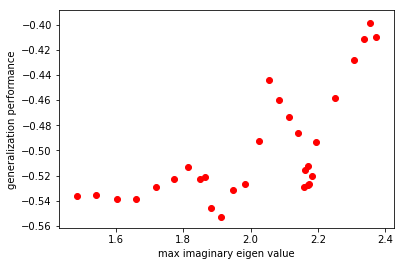

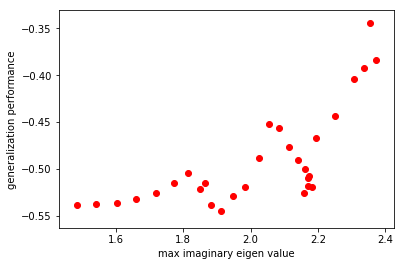

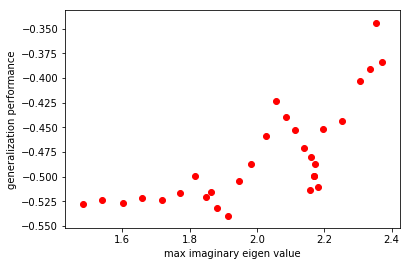

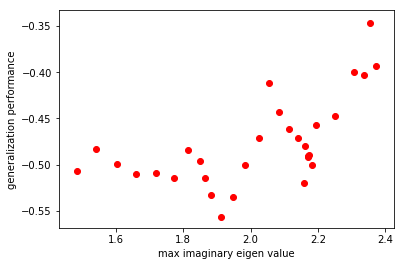

In [7]:
n = 2
m = -1
for i in range(4):
    threshold1 = 0.1 * i
    threshold2 = threshold1 + 1
    Per = []
    Eg = []
    for n in range(30):
        m = n + 4
#         print (neurons1[n:m], neurons2[n:m], neurons3[n:m])
#         print (Eigen_img[0][n:m], Eigen_img[1][n:m], Eigen_img[2][n:m])
        Performance_exxl = np.concatenate((Performance_exxl_late_1[n:m], Performance_exxl_late_2[n:m], Performance_exxl_late_3[n:m]), axis = 0)
        Performance_exl = np.concatenate((Performance_exl_late_1[n:m], Performance_exl_late_2[n:m], Performance_exl_late_3[n:m]), axis = 0)
        Performance_l = np.concatenate((Performance_l_late_1[n:m], Performance_l_late_2[n:m], Performance_l_late_3[n:m]), axis = 0)
        Performance_m = np.concatenate((Performance_m_late_1[n:m], Performance_m_late_2[n:m], Performance_m_late_3[n:m]), axis = 0)
        Performance_s = np.concatenate((Performance_s_late_1[n:m], Performance_s_late_2[n:m], Performance_s_late_3[n:m]), axis = 0)
#         print (np.mean(Performance_exxl[(Performance_m>threshold1) & (Performance_m<threshold2)]))
        plt.figure(0)
        plt.scatter(n, np.mean(Performance_exxl[(Performance_m>threshold1) & (Performance_m<threshold2)]))
        Performance_extra = (Performance_exxl + Performance_exl)/2
        Performance_M = (Performance_s + Performance_m)/2
        plt.figure(1+i)
        plt.scatter(1/3*np.mean(Eigen_img[0][n:m] + Eigen_img[1][n:m] + Eigen_img[2][n:m]), np.mean(Performance_exxl[(Performance_m>threshold1) & (Performance_m<threshold2)]), color = 'r')
        plt.xlabel('max imaginary eigen value')
        plt.ylabel('generalization performance')
        Per.append(np.mean(Performance_exxl[(Performance_m>threshold1) & (Performance_m<threshold2)]))
        Eg.append(1/3*np.mean(Eigen_img[0][n:m] + Eigen_img[1][n:m] + Eigen_img[2][n:m]))
#     print (Per)
    print (np.corrcoef(np.array(Eg), np.array(Per))[0][1])

## Eigen_img

In [35]:
Eig = []
Eig_img = np.concatenate((Eigen_img[0],Eigen_img[1], Eigen_img[2]), axis = 0)
for eig in Eig_img:
    Eig.append(eig * ones(5))
Eig = np.array(Eig)

(455,)
(455,)
0.22422349435741143
(455,)
(455,)
0.24581091133595873
(455,)
(455,)
0.20334963011016266
(455,)
(455,)
0.18004169435656064


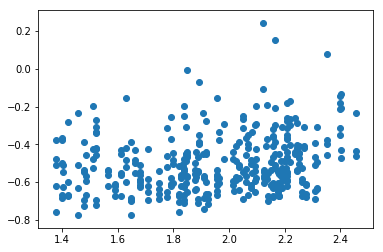

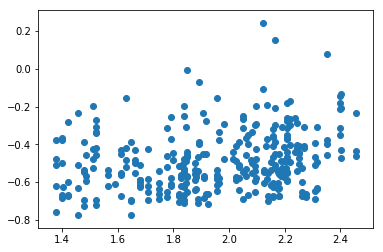

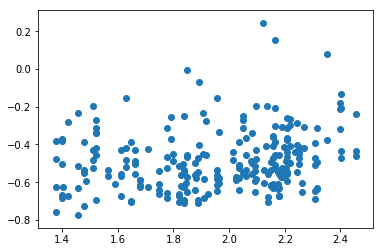

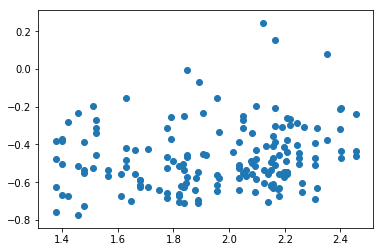

In [36]:
for i in range(4):
    Performance_exxl = np.concatenate((Performance_exxl_late_1, Performance_exxl_late_2, Performance_exxl_late_3), axis = 0)
    Performance_exl = np.concatenate((Performance_exl_late_1, Performance_exl_late_2, Performance_exl_late_3), axis = 0)
    Performance_l = np.concatenate((Performance_l_late_1, Performance_l_late_2, Performance_l_late_3), axis = 0)
    Performance_m = np.concatenate((Performance_m_late_1, Performance_m_late_2, Performance_m_late_3), axis = 0)
    Performance_s = np.concatenate((Performance_s_late_1, Performance_s_late_2, Performance_s_late_3), axis = 0)
    # Eig_img = np.concatenate((Eigen_img[0],Eigen_img[1], Eigen_img[2]), axis = 0)
    threshold1 = 0.1 + i * 0.1
    threshold2 = threshold1 + 1
    index = (Performance_m>threshold1) & (Performance_m<threshold2)
    print (index.ravel().shape)
    print (Eig.ravel().shape)
    plt.figure(i)
    # print (Eig.ravel()[index.ravel()])
    plt.scatter(Eig.ravel()[index.ravel()], Performance_exxl.ravel()[index.ravel()])
    print (np.corrcoef(Eig.ravel()[index.ravel()], Performance_exxl.ravel()[index.ravel()])[0][1])

### decoding vs performance

### This phenomena can also be associated with the eigen 0 and slope of deocoding performance

Try to regenerate data for limit cycle in limit_set = 8 in order to not peneralize the strategy upon topology

In [40]:
n = 2
m = -1
threshold = -1
for n in [0, 2, 4, 6, 8, 10]:
    Performance_exxl = np.concatenate((Performance_exxl_late_1[n:m], Performance_exxl_late_2[n:m], Performance_exxl_late_3[n:m]), axis = 0)
    Performance_exl = np.concatenate((Performance_exl_late_1[n:m], Performance_exl_late_2[n:m], Performance_exl_late_3[n:m]), axis = 0)
    Performance_l = np.concatenate((Performance_l_late_1[n:m], Performance_l_late_2[n:m], Performance_l_late_3[n:m]), axis = 0)
    Performance_m = np.concatenate((Performance_m_late_1[n:m], Performance_m_late_2[n:m], Performance_m_late_3[n:m]), axis = 0)
    Performance_s = np.concatenate((Performance_s_late_1[n:m], Performance_s_late_2[n:m], Performance_s_late_3[n:m]), axis = 0)
    print (np.mean(Performance_exl[Performance_m>threshold]))

-0.463051591671487
-0.46097863838765074
-0.45925551523464925
-0.4633416044655344
-0.4635473862465891
-0.45862568991348207


In [28]:
Performance_s = np.concatenate((Performance_s_late_1[0], Performance_s_late_2[0], Performance_s_late_3[0]), axis = 0)
# plt.hist(Performance_s.ravel(), bins = 20)
print (mean(Performance_s.ravel()))

for n in [1, 5, 10, 15]:
    t = n
    Performance_s = np.concatenate((Performance_s_late_1[n:], Performance_s_late_2[n:], Performance_s_late_3[n:]), axis = 0)
#     plt.figure()
#     plt.hist(Performance_s.ravel())
    print (np.mean(Performance_s.ravel()))

0.6026459291043587
0.6983851882694707
0.6947809169651368
0.679638050104378
0.6792264086701145


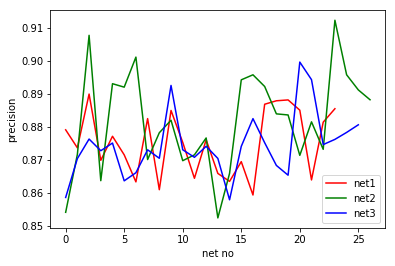

In [13]:
Decode = np.load('Decode_iniit_all.npy')
precision_l1 = np.array([1-pre/15 for pre in Decode[0]])
precision_l2 = np.array([1-pre/15 for pre in Decode[1]])
precision_l3 = np.array([1-pre/15 for pre in Decode[2]])
plt.plot(precision_l1, 'r', label = 'net1')
plt.plot(precision_l2, 'g', label = 'net2')
plt.plot(precision_l3, 'b', label = 'net3')
plt.xlabel('net no')
plt.ylabel('precision')
plt.legend()

choose net1 for 0, 39, 27,  33
choose net2 for 0, 4,5,6
choose net 3 for 0, 17, 21, 12

In [11]:
# try to understand the relation between principle component and the eigen vector = attractor here.   principle component should reflect this attractor state？  
Nets = [neurons1, neurons2, neurons3]
Prec1 = precision_l1
Prec2 = precision_l2
Prec3 = precision_l3
Precs = []
Per = []
Pr = []
for i in range(3):
    threshold1 = 0.2 * i
    threshold2 = threshold1 + 1
    for n in range(30):
        m = n + 2
#         print (neurons1[n:m], neurons2[n:m], neurons3[n:m])
#         print (Eigen_img[0][n:m], Eigen_img[1][n:m],Eigen_img[2][n:m])
        Performance_exxl = np.concatenate((Performance_exxl_late_1[n:m], Performance_exxl_late_2[n:m], Performance_exxl_late_3[n:m]), axis = 0)
        Performance_exl = np.concatenate((Performance_exl_late_1[n:m], Performance_exl_late_2[n:m], Performance_exl_late_3[n:m]), axis = 0)
        Performance_l = np.concatenate((Performance_l_late_1[n:m], Performance_l_late_2[n:m], Performance_l_late_3[n:m]), axis = 0)
        Performance_m = np.concatenate((Performance_m_late_1[n:m], Performance_m_late_2[n:m], Performance_m_late_3[n:m]), axis = 0)
        Performance_s = np.concatenate((Performance_s_late_1[n:m], Performance_s_late_2[n:m], Performance_s_late_3[n:m]), axis = 0)
#         print (np.mean(Performance_exxl[(Performance_m>threshold1) & (Performance_m<threshold2)]))
        plt.figure(0)
        plt.scatter(n, np.mean(Performance_exxl[(Performance_m>threshold1) & (Performance_m<threshold2)]))
        Performance_extra = (Performance_exxl + Performance_exl)/2
        Performance_M = (Performance_s + Performance_m)/2
        plt.figure(1+i)
#         print (Prec1[n:m])

        plt.scatter(1/3*np.mean(Prec1[n1:m1] + Prec2[n2:m2] + Prec3[n3:m3]), np.mean(Performance_exxl[(Performance_m>threshold1) & (Performance_m<threshold2)]), color = 'c')
        plt.xlabel('decoding', size = 20)
        plt.ylabel('generalization performance', size = 20)
        Pr.append(1/3*np.mean(Prec1[n:m] + Prec2[n:m] + Prec3[n:m]))
        Per.append(np.mean(Performance_exxl[(Performance_m>threshold1) & (Performance_m<threshold2)]))
#     print (Per)
    print (np.corrcoef(np.array(Pr), np.array(Per))[0][1])

NameError: name 'precision_l1' is not defined

0.14412430844894142
0.1382826719744384
0.16415004622169016
0.12585913893522366


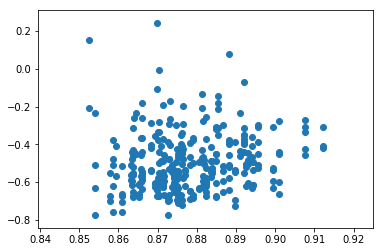

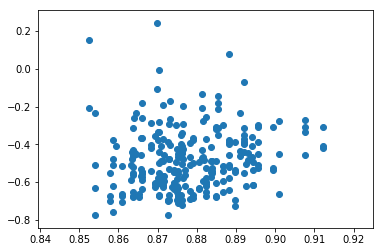

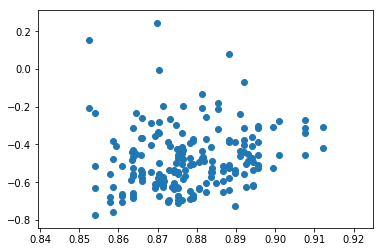

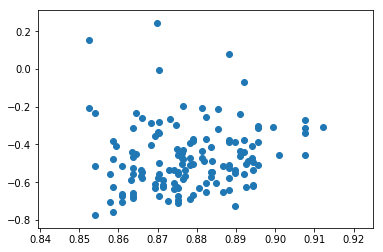

In [94]:
for i in range(4):
    Precision = []
    Precs = np.concatenate((Prec1, Prec2, Prec3), axis = 0)
    for prec in Precs:
        Precision.append(prec * ones(5))
    Precision = np.array(Precision)
    Performance_exxl = np.concatenate((Performance_exxl_late_1, Performance_exxl_late_2, Performance_exxl_late_3), axis = 0)
    Performance_exl = np.concatenate((Performance_exl_late_1, Performance_exl_late_2, Performance_exl_late_3), axis = 0)
    Performance_l = np.concatenate((Performance_l_late_1, Performance_l_late_2, Performance_l_late_3), axis = 0)
    Performance_m = np.concatenate((Performance_m_late_1, Performance_m_late_2, Performance_m_late_3), axis = 0)
    Performance_s = np.concatenate((Performance_s_late_1, Performance_s_late_2, Performance_s_late_3), axis = 0)
    # Eig_img = np.concatenate((Eigen_img[0],Eigen_img[1], Eigen_img[2]), axis = 0)
    threshold1 = 0.1 + 0.1 * i
    threshold2 = threshold1 + 1
    index = (Performance_m>threshold1) & (Performance_m<threshold2)
    plt.figure(i)
    # print (Eig.ravel()[index.ravel()])
    plt.scatter(Precision.ravel()[index.ravel()], Performance_exxl.ravel()[index.ravel()])
    print (np.corrcoef(Precision.ravel()[index.ravel()], Performance_exxl.ravel()[index.ravel()])[0][1])

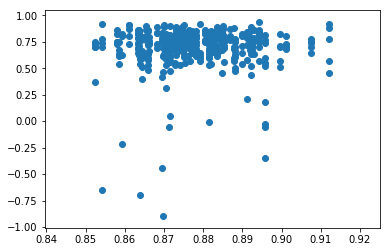

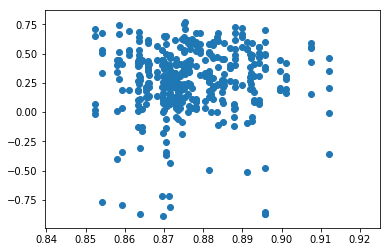

In [74]:
# for i in range(4):
Precision = []
Precs = np.concatenate((Prec1, Prec2, Prec3), axis = 0)
for prec in Precs:
    Precision.append(prec * ones(5))
Precision = np.array(Precision)
Performance_exxl = np.concatenate((Performance_exxl_late_1, Performance_exxl_late_2, Performance_exxl_late_3), axis = 0)
Performance_exl = np.concatenate((Performance_exl_late_1, Performance_exl_late_2, Performance_exl_late_3), axis = 0)
Performance_l = np.concatenate((Performance_l_late_1, Performance_l_late_2, Performance_l_late_3), axis = 0)
Performance_m = np.concatenate((Performance_m_late_1, Performance_m_late_2, Performance_m_late_3), axis = 0)
Performance_s = np.concatenate((Performance_s_late_1, Performance_s_late_2, Performance_s_late_3), axis = 0)
# Eig_img = np.concatenate((Eigen_img[0],Eigen_img[1], Eigen_img[2]), axis = 0)
#     threshold1 = 0.1 + 0.1 * i
#     threshold2 = threshold1 + 0.1
#     index = (Performance_m>threshold1) & (Performance_m<threshold2)
#     plt.figure(i)
#     # print (Eig.ravel()[index.ravel()])
plt.scatter(Precision.ravel(), Performance_s.ravel())
plt.figure()
plt.scatter(Precision.ravel(), Performance_m.ravel())

### Other features like limit cycle ratios 

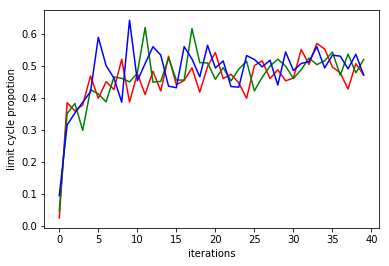

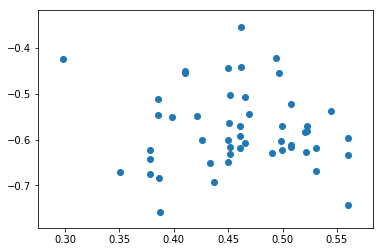

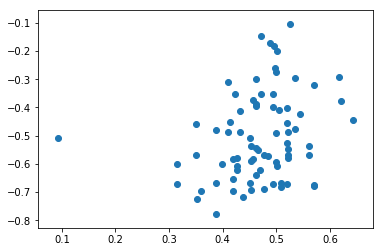

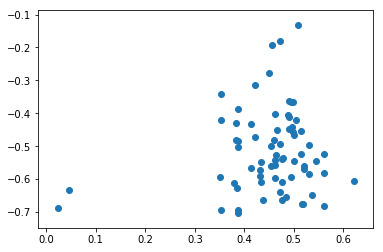

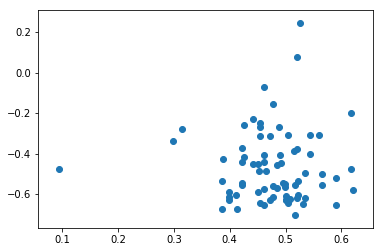

In [78]:
Rc1 = np.load('Ratio.npy')
Rc2 = np.load('Ratio_2.npy')
Rc3 = np.load('Ratio_3.npy')
plt.figure(0)
plt.plot(Rc1, 'r')
plt.plot(Rc2, 'g')
plt.plot(Rc3, 'b')
plt.xlabel('iterations')
plt.ylabel('limit cycle propotion')
plt.savefig('limit_cycle_protions')
lc1 = Rc1[neurons1]
lc2 = Rc2[neurons2]
lc3 = Rc3[neurons3]
for i in range(4):
    Lcs = []
    lcs = np.concatenate((lc1, lc2, lc3), axis = 0)
    for lc in lcs:
        Lcs.append(lc * ones(5))
    Lcs = np.array(Lcs)
    Performance_exxl = np.concatenate((Performance_exxl_late_1, Performance_exxl_late_2, Performance_exxl_late_3), axis = 0)
    Performance_exl = np.concatenate((Performance_exl_late_1, Performance_exl_late_2, Performance_exl_late_3), axis = 0)
    Performance_l = np.concatenate((Performance_l_late_1, Performance_l_late_2, Performance_l_late_3), axis = 0)
    Performance_m = np.concatenate((Performance_m_late_1, Performance_m_late_2, Performance_m_late_3), axis = 0)
    Performance_s = np.concatenate((Performance_s_late_1, Performance_s_late_2, Performance_s_late_3), axis = 0)
    # Eig_img = np.concatenate((Eigen_img[0],Eigen_img[1], Eigen_img[2]), axis = 0)
    threshold1 = 0.1 + 0.1 * i
    threshold2 = threshold1 + 0.1
    index = (Performance_m>threshold1) & (Performance_m<threshold2)
    plt.figure(i+1)
    # print (Eig.ravel()[index.ravel()])
    plt.scatter(Lcs.ravel()[index.ravel()], Performance_exxl.ravel()[index.ravel()])

## Select the best behaving neuron in generalization and measure their spatial information

In [72]:
# take the best 5 cases out
# neurons number 
Neurons_matrix = np.array([n * np.ones(5) for n in Neurons]).ravel()
# trila index 
Index = np.array([np.arange(5) for n in Neurons]).ravel()
# net index
Nets = np.array([[0] * 5 * len(neurons1) + [1] * 5 * len(neurons2) + [2] * 5 * len(neurons3)]).ravel()

Performance_m = np.concatenate((Performance_m_late_1, Performance_m_late_2, Performance_m_late_3), axis = 0)
index_max = np.argsort(Performance_m.reshape(Performance_m.shape[0] * 5, ))[-5:]
Index_max = [(i, int(n), m) for i, n, m in zip(Nets[index_max], Neurons_matrix[index_max], Index[index_max])]
Index_max[::-1]

[(0, 13, 1), (0, 32, 3), (0, 2, 0), (0, 13, 0), (1, 19, 3)]

In [73]:
urons_matrix = np.array([n * np.ones(5) for n in Neurons]).ravel()
Index = np.array([np.arange(5) for n in Neurons]).ravel()
Nets = np.array([[0] * 5 * len(neurons1) + [1] * 5 * len(neurons2) + [2] * 5 * len(neurons3)]).ravel()

Performance_m = np.concatenate((Performance_m_late_1, Performance_m_late_2, Performance_m_late_3), axis = 0) + np.concatenate((Performance_exl_late_1, Performance_exl_late_2, Performance_exl_late_3), axis = 0)
index_max = np.argsort(Performance_m.reshape(Performance_m.shape[0] * 5, ))[-10:]
Index_max = [(i, int(n), m) for i, n, m in zip(Nets[index_max], Neurons_matrix[index_max], Index[index_max])]
Index_max[::-1]

[(1, 19, 3),
 (1, 14, 0),
 (0, 2, 3),
 (1, 39, 1),
 (1, 19, 1),
 (1, 8, 0),
 (1, 24, 0),
 (0, 39, 3),
 (0, 38, 0),
 (0, 32, 1)]

In [83]:
# take the best 5 cases out
Neurons_matrix = np.array([n * np.ones(5) for n in Neurons]).ravel()
Index = np.array([np.arange(5) for n in Neurons]).ravel()
Nets = np.array([[0] * 5 * len(neurons1) + [1] * 5 * len(neurons2) + [2] * 5 * len(neurons3)]).ravel()

Performance_exl = np.concatenate((Performance_exl_late_1, Performance_exl_late_2, Performance_exl_late_3), axis = 0) + np.concatenate((Performance_exxl_late_1, Performance_exxl_late_2, Performance_exxl_late_3), axis = 0)
index_max = np.argsort(Performance_exl.reshape(Performance_exl.shape[0] * 5, ))[-40:]
Index_max = [(i, int(n), m) for i, n, m in zip(Nets[index_max], Neurons_matrix[index_max], Index[index_max])]
Index_max[::-1]

[(1, 14, 0),
 (1, 19, 3),
 (1, 39, 1),
 (2, 9, 2),
 (0, 38, 4),
 (0, 39, 0),
 (1, 8, 0),
 (1, 14, 1),
 (1, 19, 0),
 (0, 39, 2),
 (0, 38, 0),
 (2, 1, 0),
 (1, 14, 2),
 (1, 31, 3),
 (1, 21, 0),
 (1, 15, 4),
 (1, 17, 0),
 (0, 7, 4),
 (0, 39, 3),
 (0, 2, 3),
 (2, 1, 2),
 (1, 19, 1),
 (0, 15, 2),
 (2, 5, 3),
 (0, 33, 1),
 (1, 0, 2),
 (1, 37, 1),
 (2, 33, 4),
 (2, 13, 3),
 (1, 21, 2),
 (0, 35, 0),
 (1, 31, 4),
 (0, 39, 1),
 (2, 36, 1),
 (2, 29, 2),
 (2, 2, 1),
 (0, 30, 2),
 (1, 3, 3),
 (0, 17, 1),
 (1, 29, 0)]

longer time, there is no pheonmean associate with multi-stability

Here with action feedback, dynamics shift to a totally different regime which is around hopf bifurcation, but it is not hugely shaped by the stimulus

From this graph of PC, we will see that the representation states of trajectory (3,5) and (14,5) are actually qutie close to each other , reflecting symmetry in real space, it is in spirit of predictive decoding, using least number of interal states to play well. 

# Conclusion
**Internal dynamics rather than decoding performance influences more the performance in uncertain enviroments**

**Consider to think in global loops rather than separated system, thus the coupled dynamical system.  This system, which has its genome on its internal weights, will have quite different different pheno-types from the global loops,  richness of internal dynamics turns into extenable phenotypes which supports behaviours across scales.   The different types of attractors, fix point, limit cycle becomes substrate of strategy in different size rooms.  Thus generalization can be done until certain size, which offers complicate behaviour with a "simple mind"**

**The triangle between decoding, dynamics and navigation should be like: 1, dynamics coded by internal weight is most fundamental, it gives rise to different representations(phenotypes).   2,  The relation between decoding and navigation are reciprocal. not random behaviour gives better enviromental prediction(complement the free energy principle) 2,  we should distinguish internal dynamics and global dynamics**